調理手順

TensorFlowとKerasをインストール

In [249]:
import tensorflow as tf
import keras

設定

In [250]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 10

IMG_ROWS, IMG_COLS = 28, 28

グラフ描画用クラス名の配列を準備する

In [251]:
handwritten_number_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

MNISTデータセットローディング

In [252]:
from keras.datasets import mnist
#
(train_data, train_teacher_labels), (test_data, test_teacher_labels) = mnist.load_data()
print('ロードしたあと学習データ　train_data shape:', train_data.shape)
print('ロードしたあと検証データ　test_data shape:', test_data.shape)

ロードしたあと学習データ　train_data shape: (60000, 28, 28)
ロードしたあと検証データ　test_data shape: (10000, 28, 28)


学習モデルに合わせたデータ配列の形状変換

In [253]:
from keras import backend as Keras
     
print('Channel調整変換前　train_data shape:', train_data.shape)
print('Channel調整変換前　test_data shape:', test_data.shape)
#
if Keras.image_data_format() == 'channels_first':
  train_data = train_data.reshape(train_data.shape[0], 1, IMG_ROWS, IMG_COLS)
  test_data = test_data.reshape(test_data.shape[0], 1, IMG_ROWS, IMG_COLS)
  input_shape = (1, IMG_ROWS, IMG_COLS)
else:
  train_data = train_data.reshape(train_data.shape[0], IMG_ROWS, IMG_COLS, 1)
  test_data = test_data.reshape(test_data.shape[0], IMG_ROWS, IMG_COLS, 1)
  input_shape = (IMG_ROWS, IMG_COLS, 1)

print('Channel調整変換後　train_data shape:', train_data.shape)
print('Channel調整変換後　test_data shape:', test_data.shape)

Channel調整変換前　train_data shape: (60000, 28, 28)
Channel調整変換前　test_data shape: (10000, 28, 28)
Channel調整変換後　train_data shape: (60000, 28, 28, 1)
Channel調整変換後　test_data shape: (10000, 28, 28, 1)


学習モデルに合わせてデータ調整

今のデータの型はunit8なので、データをfloat32に変換する必要がある

In [254]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print(test_data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [255]:
train_data = train_data / 255
test_data = test_data / 255

print('学習データ　train_data shape:', train_data.shape)
print(train_data.shape[0], 'サンプルを学習します')
print('検証データ　test_data shape:', test_data.shape)
print(test_data.shape[0], 'サンプルを検証します')

# train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
# test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))
# print(train_data)
# print(test_data)

学習データ　train_data shape: (60000, 28, 28, 1)
60000 サンプルを学習します
検証データ　test_data shape: (10000, 28, 28, 1)
10000 サンプルを検証します


教師ラベルデータの変換

In [256]:
import keras

# 学習用教師ラベルデータをOne-hotベクトルに変換します
print('Keras変換前学習用教師ラベルデータ　train_teacher_labels shape:', train_teacher_labels.shape)
train_teacher_labels= keras.utils.to_categorical(train_teacher_labels, NUM_CLASSES)
print('Keras変換後学習用教師ラベルデータ　train_teacher_labels shape:',train_teacher_labels.shape)

# 検証用教師ラベルデータをOne-hotベクトルに変換します
print('Keras変換前検証用教師ラベルデータ　test_teacher_labels shape:', test_teacher_labels.shape)
print(test_teacher_labels)
test_teacher_labels = keras.utils.to_categorical(test_teacher_labels, NUM_CLASSES)
print('Keras変換後検証用教師ラベルデータ　test_teacher_labels shape:',test_teacher_labels.shape)
print(test_teacher_labels)
# from keras.utils import to_categorical
# train_teacher_labels = to_categorical(train_teacher_labels, num_classes=10)
# test_teacher_labels = to_categorical(test_teacher_labels, num_classes=10)

Keras変換前学習用教師ラベルデータ　train_teacher_labels shape: (60000,)
Keras変換後学習用教師ラベルデータ　train_teacher_labels shape: (60000, 10)
Keras変換前検証用教師ラベルデータ　test_teacher_labels shape: (10000,)
[7 2 1 ... 4 5 6]
Keras変換後検証用教師ラベルデータ　test_teacher_labels shape: (10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


シーケンシャルモデル指定

In [257]:
from keras.models import Sequential
model = Sequential()

学習モデルの構築

In [258]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

ニューラルネットワークの構築

In [259]:
from keras import models
from keras import layers
# Build a convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 576)             

モデルのコンパイル

In [260]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

学習

学習前のデータをもう一度確認する

In [261]:
print('学習させる前　train_data shape:', train_data.shape)
print('学習させる前　test_data shape:', test_data.shape)

学習させる前　train_data shape: (60000, 28, 28, 1)
学習させる前　test_data shape: (10000, 28, 28, 1)


学習プロセスで、学習のグラフを描画する関数も定義する

In [262]:
def plot_loss_accuracy_graph(fit_record):
  # 青い線で誤差の履歴をプロットします、検証時誤差は黒い線で
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()
  
  # 緑の線で精度の履歴をプロットします、検証時制度は黒い線で
  plt.plot(fit_record.history['accuracy'],"-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_accuracy'],"-o",color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc="lower right")
  plt.show()

学習プロセスを始める

In [263]:
print('反復学習回数：', EPOCHS)
fit_record=model.fit(train_data, train_teacher_labels,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  verbose=1,
                  validation_data=(test_data, test_teacher_labels))

反復学習回数： 10
Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.2448 - accuracy: 0.9251 - val_loss: 0.0600 - val_accuracy: 0.9810
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0398 - val_accuracy: 0.9876
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0406 - val_accuracy: 0.9869
Epoch 4/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0292 - val_accuracy: 0.9905
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0299 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0306 - va

学習プロセスのグラフ

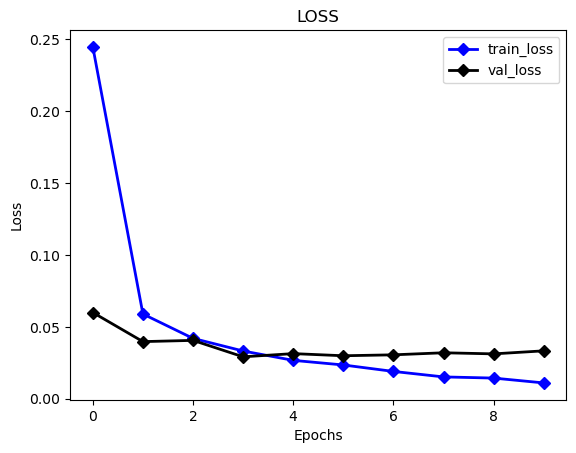

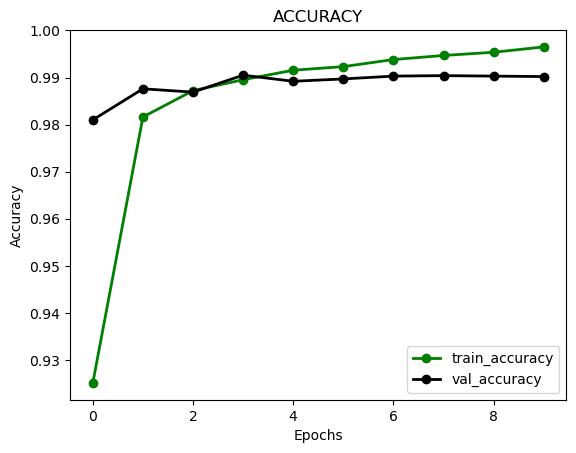

In [264]:
import matplotlib.pyplot as plt

plot_loss_accuracy_graph(fit_record)

検証

In [265]:
result_score = model.evaluate(test_data, test_teacher_labels, verbose=0)

検証結果表示

In [266]:
print('検証誤差:', result_score[0])
print('検証正解率:', result_score[1])

検証誤差: 0.033334966748952866
検証正解率: 0.9901999831199646


予測

In [267]:
prediction_array = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [268]:
import numpy as np
     

def plot_image(data_location, predictions_array, real_teacher_labels, dataset):
  predictions_array, real_teacher_labels, img = predictions_array[data_location], real_teacher_labels[data_location], dataset[data_location]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array)
  # 文字の色：予測結果と実際のラベルと一致する場合は緑、一致しない場合、赤にします
  if predicted_label == real_teacher_labels:
    color = 'green'
  else:
    color = 'red'
  # np.maxはnumpyの関数で、指定した配列の中、最大値を取り出します、ここでは、predictions_arrayの最大値を返します
  plt.xlabel("{} {:2.0f}% ({})".format(handwritten_number_names[predicted_label],
                                100*np.max(predictions_array),
                                handwritten_number_names[real_teacher_labels]),
                                color=color)

In [269]:
def plot_teacher_labels_graph(data_location, predictions_array, real_teacher_labels):
  predictions_array, real_teacher_labels = predictions_array[data_location], real_teacher_labels[data_location]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#666666")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[real_teacher_labels].set_color('green')

one-hot vectorを整数の配列に変換する関数

In [270]:
def convertOneHotVector2Integers(one_hot_vector):
  return [np.where(r==1)[0][0] for r in one_hot_vector]

In [271]:
print(test_teacher_labels)
print(convertOneHotVector2Integers(test_teacher_labels))

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 

In [272]:
test_data.shape

(10000, 28, 28, 1)

In [273]:
test_data.shape[0]

10000

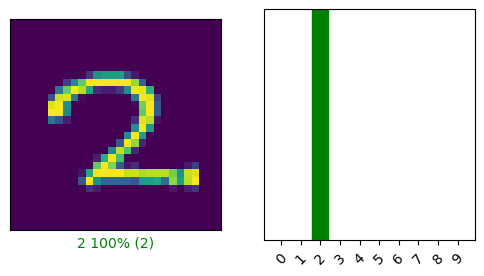

In [274]:
# 描画のために検証データを変換しておきます
test_data = test_data.reshape(test_data.shape[0], IMG_ROWS, IMG_COLS)

data_location = 77
plt.figure(figsize=(6,3))
#
plt.subplot(1,2,1)
plot_image(data_location, prediction_array,convertOneHotVector2Integers(test_teacher_labels), test_data)
#
plt.subplot(1,2,2)
plot_teacher_labels_graph(data_location, prediction_array, convertOneHotVector2Integers(test_teacher_labels))
_ = plt.xticks(range(10), handwritten_number_names, rotation=45)

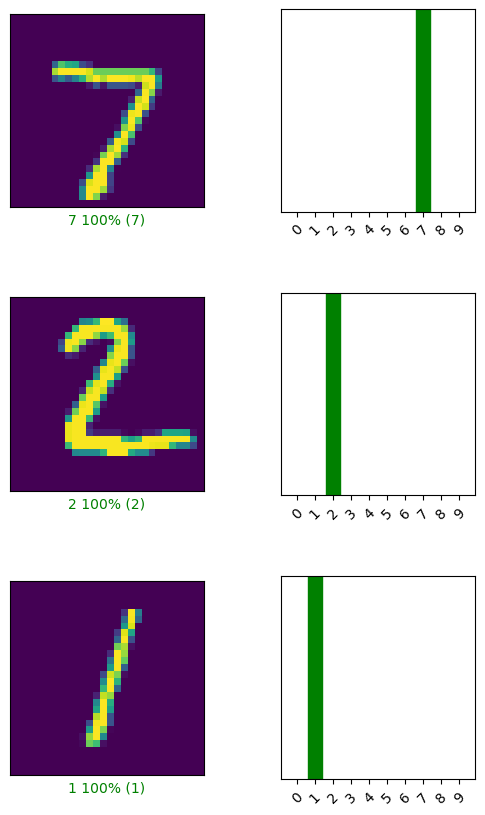

In [275]:
NUM_ROWS = 3
NUM_COLS = 1
NUM_IMAGES = NUM_ROWS*NUM_COLS
#
plt.figure(figsize=(2*2*NUM_COLS+2, 2*NUM_ROWS+4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(NUM_IMAGES):
  #
  plt.subplot(NUM_ROWS, 2*NUM_COLS, 2*i+1)
  plot_image(i, prediction_array,convertOneHotVector2Integers(test_teacher_labels), test_data)
  #
  plt.subplot(NUM_ROWS, 2*NUM_COLS, 2*i+2)
  plot_teacher_labels_graph(i, prediction_array, convertOneHotVector2Integers(test_teacher_labels))
  _ = plt.xticks(range(10), handwritten_number_names, rotation=45)

(28, 28)


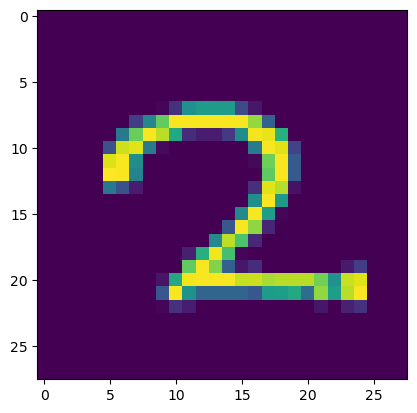

In [276]:
# 検証データから画像を表示します
img = test_data[data_location]
print(img.shape)

plt.imshow(img)

In [277]:
img = (np.expand_dims(img,0))
img =img.reshape(1, IMG_ROWS, IMG_COLS, 1)
print(img.shape)

(1, 28, 28, 1)


In [278]:
predictions_result_array = model.predict(img)

print(predictions_result_array)

1/1 [==============================] - 0s 11ms/step
[[4.32482921e-06 1.15887353e-08 9.99814212e-01 6.96055649e-05
  1.04218731e-08 1.18721954e-09 9.34988684e-11 1.01669655e-04
  1.01845253e-05 3.59444385e-08]]


In [279]:
number=np.argmax(predictions_result_array[0])
print('予測結果：',handwritten_number_names[number])

予測結果： 2


学習済みモデルの保存

In [280]:
model.save('keras-mnist-model0910-5.h5')

c:\Users\manab\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
